In [1]:
import Pkg
Pkg.activate("../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [4]:
includet("../_wip/VARs/utils.jl")
includet("../_wip/VARs/VAR_OLS.jl")

In [50]:
df = DataFrame(XLSX.readtable("../data/usa_macro_data_s.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.year, first)

cpi_y = percentchange(data_source[:USACPIALLQINMEI], :log) .* 100

nominal_Δd_y = round.(percentchange(data_source[:Dividend], :log) .* 100, digits=2) 

Δd_y = nominal_Δd .- cpi_y


display((returns_summarystats(merge(nominal_Δd_y, Δd_y, cpi_y), 1)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
Dividend,7.1398,16.28,5.3155,9.81,-22.49,-1.7142,2.24,0.4203,5.0681,0.7445,6.01
Dividend_USACPIALLQINMEI,2.1148,3.1627,-1.0832,0.2748,-6.0531,-0.3529,-2.2296,0.4868,-0.0802,-0.5122,-0.7822
USACPIALLQINMEI,1.4629,7.6653,2.4626,2.9969,-0.0627,1.3585,1.654,0.2539,3.6385,1.6834,2.3952


nothing

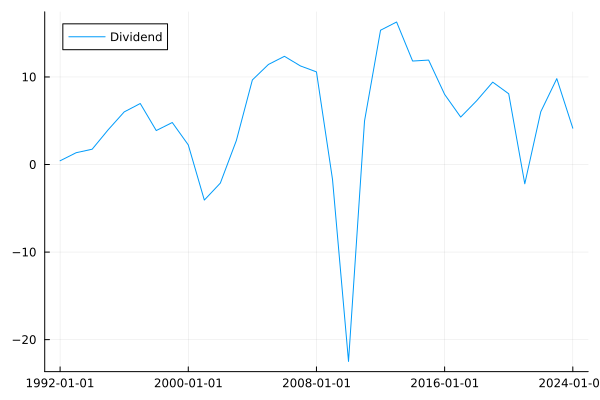

In [46]:
plot(nominal_Δd_y)

In [49]:
source_quarter = collapse(TimeArray(df; timestamp = :observation_date), Dates.quarter, first)

cpi = percentchange(source_quarter[:USACPIALLQINMEI], :log) .* 100

nominal_Δd = round.(percentchange(source_quarter[:Dividend], :log) .* 100, digits=2) 

Δd = nominal_Δd .- cpi

display((returns_summarystats(merge(nominal_Δd, Δd, cpi), 4)))


,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
Dividend,3.757,20.44,5.4125,10.38,-26.6,-1.6666,2.4,0.8984,4.85,1.4406,6.16
Dividend_USACPIALLQINMEI,3.8855,20.2959,2.887,7.4204,-29.3072,-1.3413,-0.3078,0.8156,4.0226,0.743,4.162
USACPIALLQINMEI,1.3166,11.7217,2.5255,3.985,-11.4772,-0.6713,1.3615,0.2825,6.3516,1.9182,2.3839


nothing

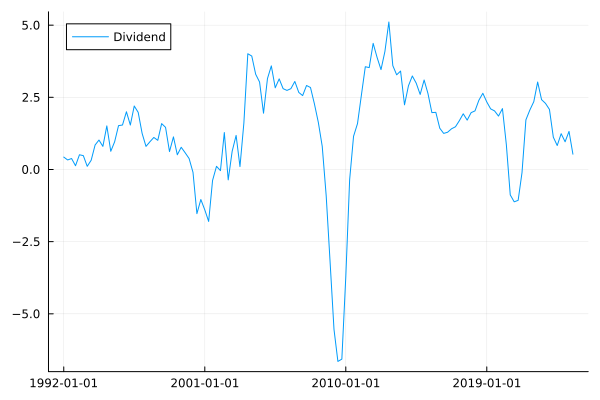

In [41]:
plot(nominal_Δd)

In [51]:
nominal_Δd[Date(2017, 01, 01): Date(2019, 12, 31)]

12×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2017-01-01 to 2019-10-01
┌────────────┬──────────┐
│            │ Dividend │
├────────────┼──────────┤
│ 2017-01-01 │     1.48 │
│ 2017-04-01 │     1.69 │
│ 2017-07-01 │     1.93 │
│ 2017-10-01 │     1.71 │
│ 2018-01-01 │     1.97 │
│ 2018-04-01 │     2.03 │
│ 2018-07-01 │      2.4 │
│ 2018-10-01 │     2.64 │
│ 2019-01-01 │     2.34 │
│ 2019-04-01 │      2.1 │
│ 2019-07-01 │     2.03 │
│ 2019-10-01 │     1.85 │
└────────────┴──────────┘

In [52]:
nominal_Δd[Date(2021, 01, 01): Date(2024, 12, 31)]

15×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2021-01-01 to 2024-07-01
┌────────────┬──────────┐
│            │ Dividend │
├────────────┼──────────┤
│ 2021-01-01 │    -1.07 │
│ 2021-04-01 │    -0.11 │
│ 2021-07-01 │     1.72 │
│ 2021-10-01 │     2.06 │
│ 2022-01-01 │     2.35 │
│ 2022-04-01 │     3.03 │
│ 2022-07-01 │     2.42 │
│ 2022-10-01 │     2.29 │
│ 2023-01-01 │     2.08 │
│ 2023-04-01 │     1.12 │
│ 2023-07-01 │     0.83 │
│ 2023-10-01 │     1.24 │
│ 2024-01-01 │     0.96 │
│ 2024-04-01 │     1.32 │
│ 2024-07-01 │     0.53 │
└────────────┴──────────┘

In [20]:
avg4q = moving(mean, merge(nominal_Δd, Δd), 4)

display((returns_summarystats(avg4q, 4)))

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
Dividend,3.4785,16.54,5.4806,10.37,-22.48,-1.4952,2.525,0.9497,3.6699,1.5756,6.125
Dividend_USACPIALLQINMEI,3.4385,14.6967,2.9642,7.7034,-24.8131,-1.2492,-0.2757,0.9461,3.0794,0.8621,3.2732


nothing

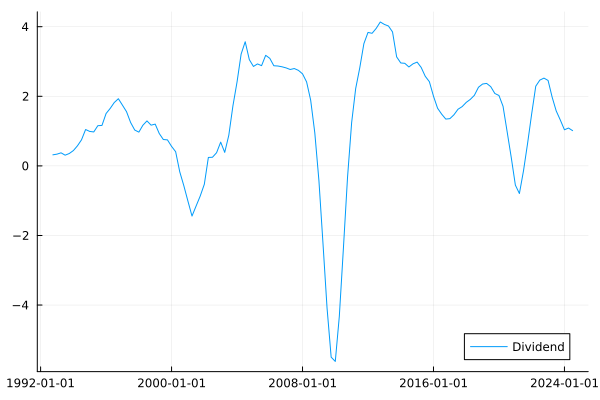

In [43]:
plot(avg4q[:Dividend])

In [40]:
log_div = log.(source_quarter[:Dividend])

nom_Δd_ann =  log_div[5:end] .- lag(log_div, 4)  

display((returns_summarystats(nom_Δd_ann, 1)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
Dividend_Dividend,0.0696,0.1655,0.0548,0.1037,-0.2249,-1.4953,0.0253,0.9497,3.6745,0.7877,0.0613


nothing

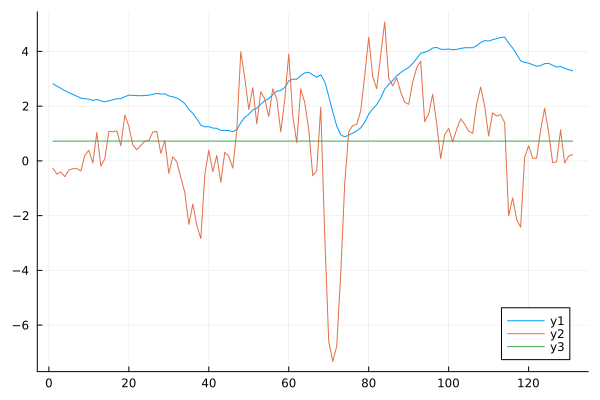

In [102]:
mean_Δd = values(mean(Δd))[1]

Δd_demeaned = values(Δd) .- mean_Δd

T = size(Δd_demeaned,1)

v = .018


expected_Δd = zeros(T)

expected_Δd[1] = v * Δd_demeaned[1]

for t in 2:T
    expected_Δd[t] = expected_Δd[t-1] + v * (Δd_demeaned[t] - expected_Δd[t-1])
end


expected_Δd = (expected_Δd .+ mean_Δd) * 4


plot(expected_Δd)
plot!(values(Δd))
plot!(fill(mean_Δd, T))



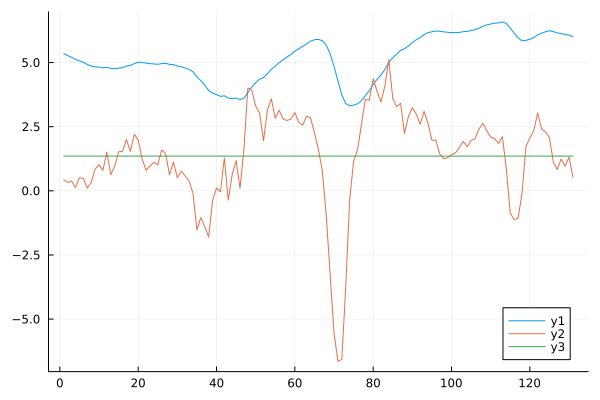

In [106]:
mean_Δd = values(mean(nominal_Δd))[1]

Δd_demeaned = values(nominal_Δd) .- mean_Δd

T = size(Δd_demeaned,1)

v = .018


expected_Δd = zeros(T)

expected_Δd[1] = v * Δd_demeaned[1]

for t in 2:T
    expected_Δd[t] = expected_Δd[t-1] + v * (Δd_demeaned[t] - expected_Δd[t-1])
end


expected_Δd = (expected_Δd .+ mean_Δd) * 4


plot(expected_Δd)
plot!(values(nominal_Δd))
plot!(fill(mean_Δd, T))

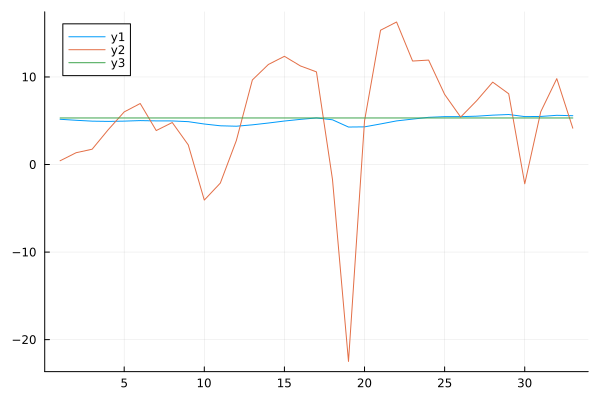

In [109]:
mean_Δd = values(mean(nominal_Δd_y))[1]

Δd_demeaned = values(nominal_Δd_y) .- mean_Δd

T = size(Δd_demeaned,1)

v = .03


expected_Δd = zeros(T)

expected_Δd[1] = v * Δd_demeaned[1]

for t in 2:T
    expected_Δd[t] = expected_Δd[t-1] + v * (Δd_demeaned[t] - expected_Δd[t-1])
end


expected_Δd = (expected_Δd .+ mean_Δd) 


plot(expected_Δd)
plot!(values(nominal_Δd_y))
plot!(fill(mean_Δd, T))